In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


# Stepper Timing

In [2]:
limit = [450, 200, 150] # microseconds
increment = [-1., -3., -0.5] # microseconds
delay = 600 # Initial delay

timing = [delay]
delta_timing = [increment[0]]
total = 0

while delay > limit[-1]:
    total += int(delay)
    for i in range(len(limit)):
        if delay > limit[i]:
            delay += increment[i]
            break
    timing.append(delay)
    delta_timing.append(increment[i])

rpm = 1./(360/0.9*2*limit[-1]/1e6)*60
print("total: {} s".format(total/1e6))
print("rpm: {} rpm".format(rpm))

total: 0.122871 s
rpm: 500.00000000000006 rpm


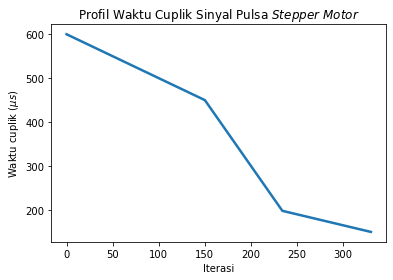

In [3]:
plt.plot(timing, linewidth=2.5)
plt.xlabel("Iterasi")
plt.ylabel(r"Waktu cuplik ($\mu s$)")
plt.title(r"Profil Waktu Cuplik Sinyal Pulsa $Stepper$ $Motor$")
plt.savefig("profil_sinyal_stepper.png", dpi=500, transparent=True)
plt.show()

# Import Rosbag Data

In [4]:
ls

log_steer_2020-07-17-09-43-48.bag
log_steer_dua_orang_lantai_licin_2020-08-12-20-06-32.bag
log_steer_tanpa_orang_laintai_licin_2020-08-12-20-04-45.bag
newest/
profil_kecepatan_sudut_kemudi.png
profil_sinyal_stepper.png
profil_sudut_kemudi.png
steering_angle_calibration.ipynb


In [5]:
bag = rosbag.Bag('log_steer_tanpa_orang_laintai_licin_2020-08-12-20-04-45.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=926, connections=1, frequency=20.00517025102427), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2305, connections=1, frequency=49.607380248373744)})

# Tanpa Orang Lantai Licin

In [6]:
bag = rosbag.Bag('newest/log_steer_licin_tanpa_orang_2020-08-24-10-01-45.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f', 'rosgraph_msgs/Log': 'acffd30cd6b6de30f120938c17c593fb'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=917, connections=1, frequency=20.002451243386055), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2285, connections=1, frequency=49.51017517352094), '/rosout': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=4, connections=2, frequency=28532.680272108842)})

In [7]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_1 = np.array(list_t_header)
list_t_header_1 -= list_t_header_1[0]

dt = list_t[1:] - list_t[:-1]
dt_header_1 = list_t_header_1[1:] - list_t_header_1[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_1 = savgol_filter(np.array(list_t_header), 101, 3)

steering_setpoint_1 = np.array(list_steering_setpoint)
steering_delta_1 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_1 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_1 = savgol_filter(np.gradient(steering_angle_1, list_t_header_1), 101, 3)

Sampling Rate yang digunakan di rospy adalah 50 Hz

dt_header
mean: 0.020072144823191255
std: 0.0003473682414769362



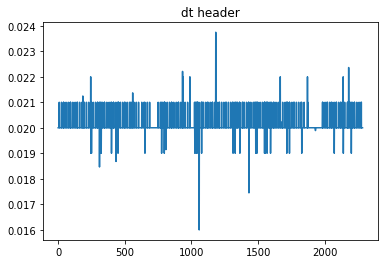

In [8]:
print('Sampling Rate yang digunakan di rospy adalah 50 Hz\n')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header_1)))
print('std: {}'.format(np.std(dt_header_1)))
print('')

plt.plot(dt_header_1)
plt.title("dt header")
plt.show()

In [9]:
idx1 = np.where(np.abs(steering_setpoint_1[1:] - steering_setpoint_1[:-1]) >= 1)[0]
idx_1 = [idx1[0], -1]#idx_1[-1] + 500]

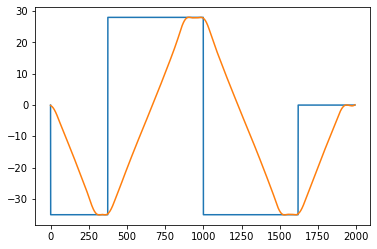

In [10]:
plt.plot(steering_setpoint_1[idx_1[0]:idx_1[1]])
plt.plot(steering_angle_1[idx_1[0]:idx_1[1]])

# Empat Orang Lantai Licin

## Import Data

In [11]:
bag = rosbag.Bag('newest/log_steer_licin_4_orang_2020-08-24-10-18-13.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f', 'rosgraph_msgs/Log': 'acffd30cd6b6de30f120938c17c593fb'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=953, connections=1, frequency=20.003929910241613), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2375, connections=1, frequency=49.61442191677116), '/rosout': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=5, connections=2, frequency=84.0912626809415)})

In [12]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_2 = np.array(list_t_header)
list_t_header_2 -= list_t_header_2[0]

dt = list_t[1:] - list_t[:-1]
dt_header_2 = list_t_header_2[1:] - list_t_header_2[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_2 = savgol_filter(np.array(list_t_header), 101, 3)

steering_setpoint_2 = np.array(list_steering_setpoint)
steering_delta_2 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_2 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_2 = savgol_filter(np.gradient(steering_angle_2, list_t_header_2), 101, 3)

Sampling Rate yang digunakan di rospy adalah 50 Hz

dt_header
mean: 0.020074710990565105
std: 0.00034242984752278356



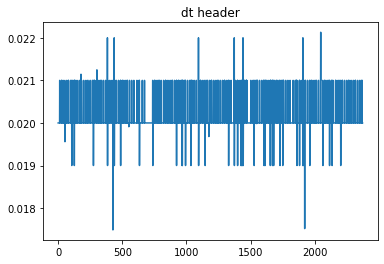

In [13]:
print('Sampling Rate yang digunakan di rospy adalah 50 Hz\n')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header_2)))
print('std: {}'.format(np.std(dt_header_2)))
print('')

plt.plot(dt_header_2)
plt.title("dt header")
plt.show()

In [14]:
idx2 = np.where(np.abs(steering_setpoint_2[1:] - steering_setpoint_2[:-1]) >= 1)[0]
idx_2 = [idx2[0], -1]#idx_2[-1] + 500]

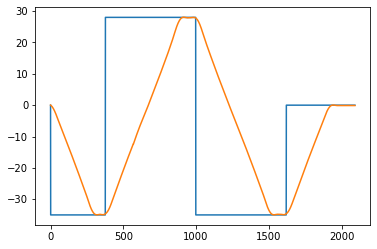

In [15]:
plt.plot(steering_setpoint_2[idx_2[0]:idx_2[1]])
plt.plot(steering_angle_2[idx_2[0]:idx_2[1]])

# Analisis dan PLOT

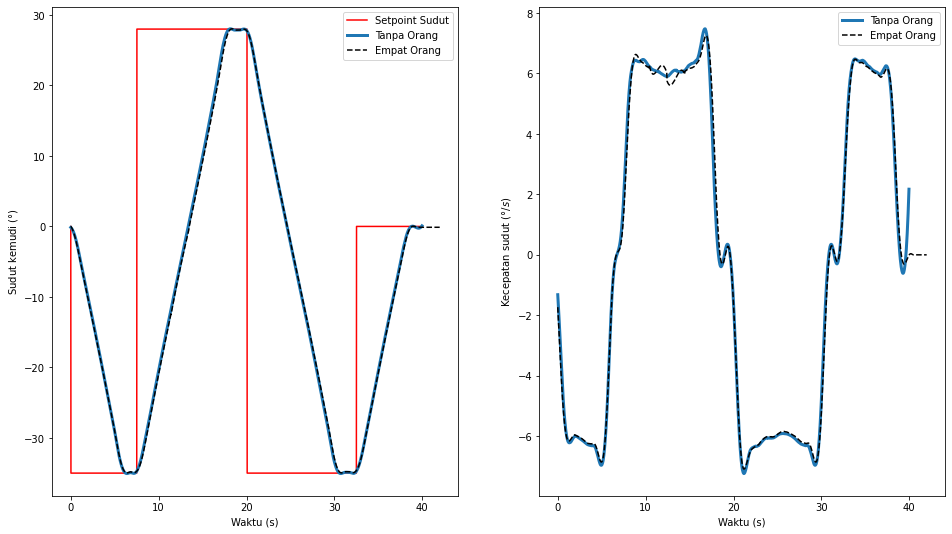

In [16]:
scale = 1.
plt.figure(figsize=(16*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,2,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_setpoint_1[idx_1[0]:idx_1[1]], label=r'Setpoint Sudut', color='red')
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_angle_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], steering_angle_2[idx_2[0]:idx_2[1]], label='Empat Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Sudut kemudi $(\degree)$')
#plt.title('Profil Sudut Kemudi', fontweight='bold')
plt.legend()

# Plot the steering angle
plt.subplot(1,2,2)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], w_filtered_header_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], w_filtered_header_2[idx_2[0]:idx_2[1]], label='Empat Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Kecepatan sudut $(\degree/s)$')
#plt.title('Profil Kecepatan Sudut Kemudi', fontweight='bold')
plt.legend()

#plt.savefig('kalibrasi_absolute_encoder.png', dpi=600, transparent=True)
plt.show()

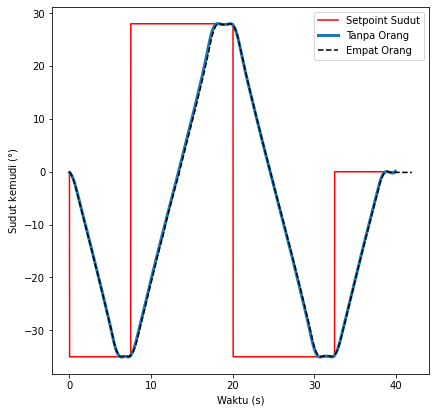

In [17]:
scale = 0.75
plt.figure(figsize=(9*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,1,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_setpoint_1[idx_1[0]:idx_1[1]], label=r'Setpoint Sudut', color='red')
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_angle_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], steering_angle_2[idx_2[0]:idx_2[1]], label='Empat Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Sudut kemudi $(\degree)$')
#plt.title('Profil Sudut Kemudi', fontweight='bold')
plt.legend()
plt.savefig('profil_sudut_kemudi.png', dpi=600, transparent=True)
plt.show()

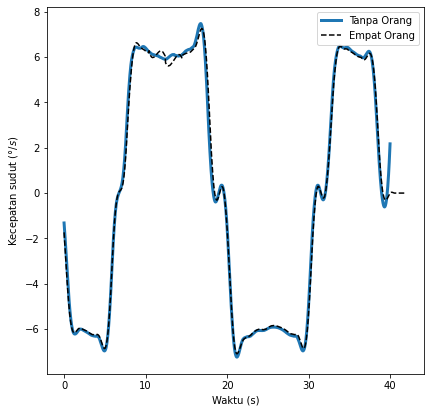

In [18]:
scale = 0.75
plt.figure(figsize=(9*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,1,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], w_filtered_header_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], w_filtered_header_2[idx_2[0]:idx_2[1]], label='Empat Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Kecepatan sudut $(\degree/s)$')
#plt.title('Profil Kecepatan Sudut Kemudi', fontweight='bold')
plt.legend()
plt.savefig('profil_kecepatan_sudut_kemudi.png', dpi=600, transparent=True)
plt.show()

# Waktu yang Dibutuhkan

# Tanpa Beban

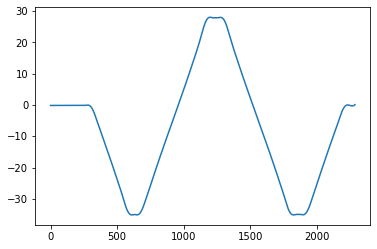

In [19]:
plt.plot(steering_angle_1)

In [20]:
idx1

array([ 292,  666, 1291, 1911])

In [21]:
np.where(np.abs(steering_delta_1) <= 0.05)

(array([ 600,  601,  602,  603,  604,  605,  606,  615,  616,  640, 1188,
        1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199,
        1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1265,
        1812, 1813, 1814, 1815, 1816, 1817, 1818, 1827, 1828, 1829, 1830,
        1831, 1832, 1833, 1834, 1835, 1836, 1837, 1886, 2220, 2221, 2222,
        2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233,
        2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2280, 2281, 2282]),)

In [22]:
print("STAGE 1: {} s".format(list_t_header_1[600] - list_t_header_1[idx1[0]]))
print("STAGE 2: {} s".format(list_t_header_1[1188] - list_t_header_1[idx1[1]]))
print("STAGE 3: {} s".format(list_t_header_1[1812] - list_t_header_1[idx1[2]]))
print("STAGE 4: {} s".format(list_t_header_1[2220] - list_t_header_1[idx1[3]]))

STAGE 1: 6.182507038116455 s
STAGE 2: 10.477092981338501 s
STAGE 3: 10.45867919921875 s
STAGE 4: 6.201253890991211 s


# Dengan 2 Orang

In [23]:
idx2

array([ 282,  658, 1279, 1901])

In [24]:
np.where(np.abs(steering_delta_2) <= 0.05)

(array([ 596,  597,  598,  599,  600,  601,  602,  603,  604,  605,  606,
        1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198,
        1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1813,
        1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 2214, 2215, 2216,
        2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227,
        2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236]),)

In [25]:
print("STAGE 1: {} s".format(list_t_header_1[596] - list_t_header_1[idx1[0]]))
print("STAGE 2: {} s".format(list_t_header_1[1188] - list_t_header_1[idx1[1]]))
print("STAGE 3: {} s".format(list_t_header_1[1813] - list_t_header_1[idx1[2]]))
print("STAGE 4: {} s".format(list_t_header_1[2214] - list_t_header_1[idx1[3]]))

STAGE 1: 6.102506875991821 s
STAGE 2: 10.477092981338501 s
STAGE 3: 10.478679180145264 s
STAGE 4: 6.081254005432129 s
